**Introduction**

This notebook will focus on the practical application of unsupervised learning methods, specifically K-means clustering and Principal Component Analysis (PCA).

## Import needed Packages
All imports needed for this notebook to run

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.decomposition import PCA

## Data Exploration

In [51]:
# load the data
df = pd.read_csv(r"/content/customer_segmentation.csv")

# description on the data can be found here: https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign

In [52]:
# viewing the df
df.head(20)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [53]:
# getting sense of the data types and frequencies
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Looking at the data frequencies, it can be seen that there is almost no missing values. Only the "Income" column contains missing values, though they occur only occasionally, so the mean value will be used to fill in these gaps.

In [54]:
# some statistics on the data
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [55]:
# filling missing values with the mean value of the income column
mean_value = df['Income'].mean()
df['Income'].fillna(value=mean_value, inplace=True)

In [56]:
# checking the data after the update
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Visualization
**Three** insightful visualizations based on the customer segmentation dataset. The purpose of these visualizations is to uncover underlying patterns and trends in the data that can inform strategic decisions.


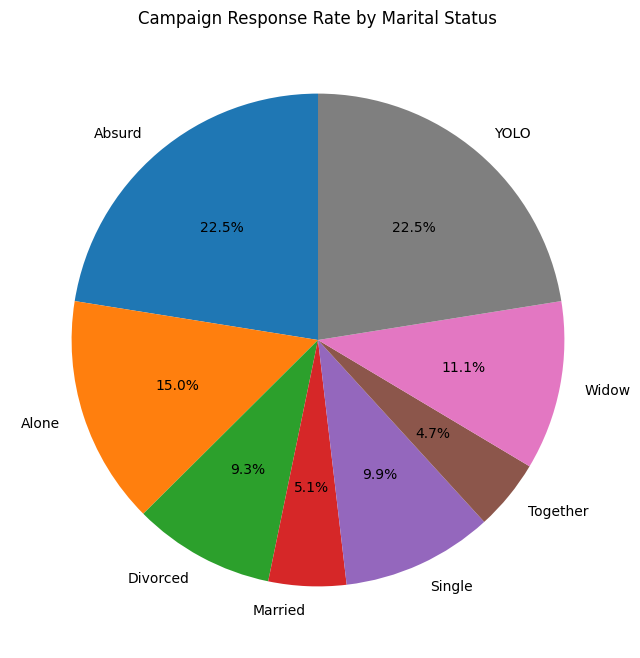

In [57]:
# Graph 1 - Campaign Response Rate by Marital Status

plt.figure(figsize=(8, 8))

# Calculate the mean value of each group
response_by_marital = df.groupby('Marital_Status')['Response'].mean()

# Create a pie plot
plt.pie(response_by_marital, labels=response_by_marital.index, autopct='%1.1f%%', startangle=90)
plt.title('Campaign Response Rate by Marital Status')
plt.show()

**Insight** - This graph reveals that individuals who identified themselves as 'YOLO', 'Absurd' and 'Alone' are more inclined to respond to the marketing campaign compared to those who indicated their marital status as 'Married' or 'Together', who appear less responsive. Based on these insights, it may be strategic to consider increasing the number of campaigns targeting the former groups to capitalize on their higher likelihood of response.

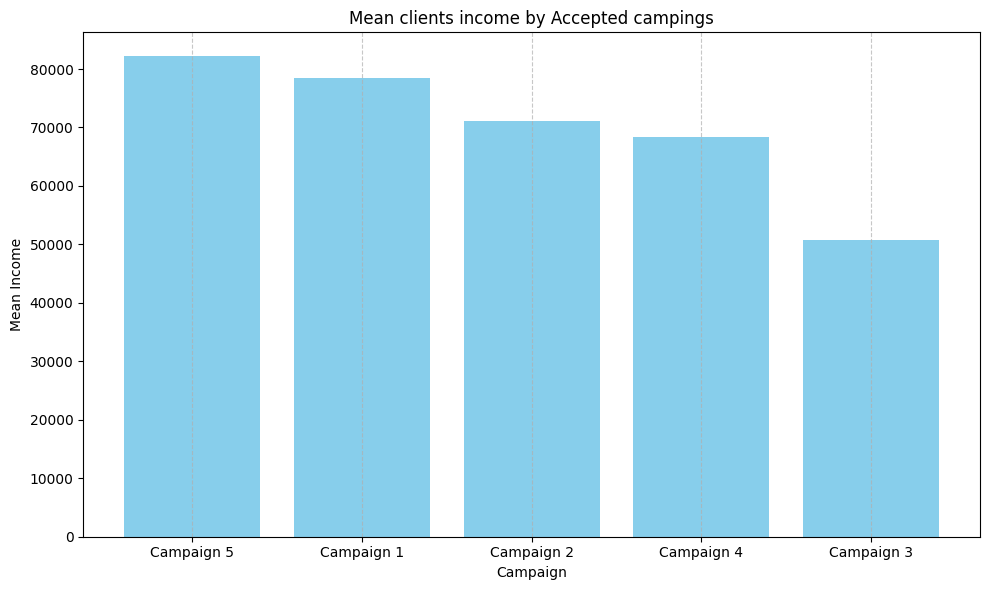

In [58]:
# Graph 2 - Mean clients income by Accepted campings

camp_list = ['AcceptedCmp1',	'AcceptedCmp2', 'AcceptedCmp3',	'AcceptedCmp4',	'AcceptedCmp5']
mean_incomes = []

# calculate the mean income for accepted campaigns for each campign
for camp in camp_list:
  mean_incomes.append(df[df[camp] == 1]['Income'].mean())

# initializing campigns names for the plot
campaigns = ['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5']

# sorting by mean in descending order
camp_with_mean_income = zip(campaigns, mean_incomes)
sorted_camp_with_mean_income = sorted(camp_with_mean_income, key=lambda x:x[1], reverse=True)

sorted_campaigns, sorted_mean_incomes = zip(*sorted_camp_with_mean_income)

# creating a plot
plt.figure(figsize=(10, 6))
plt.bar(sorted_campaigns, sorted_mean_incomes, color='skyblue')
plt.xlabel('Campaign')
plt.ylabel('Mean Income')
plt.title('Mean clients income by Accepted campings')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Insight** -
The bar plot highlights notable differences in average yearly incomes across various marketing campaigns, notably with Campaign 5 appealing to individuals with an average income of approximately 80,000, while Campaign 3 caters to those with a lower average income of around 50,000. Tailoring messaging and channel selection based on income demographics can significantly boost marketing effectiveness. Therefore, it's advisable to deploy Campaign 5 towards customers with higher incomes, while Campaign 3 can be targeted towards those with lower incomes, ensuring a more strategic allocation of resources and maximizing campaign impact.

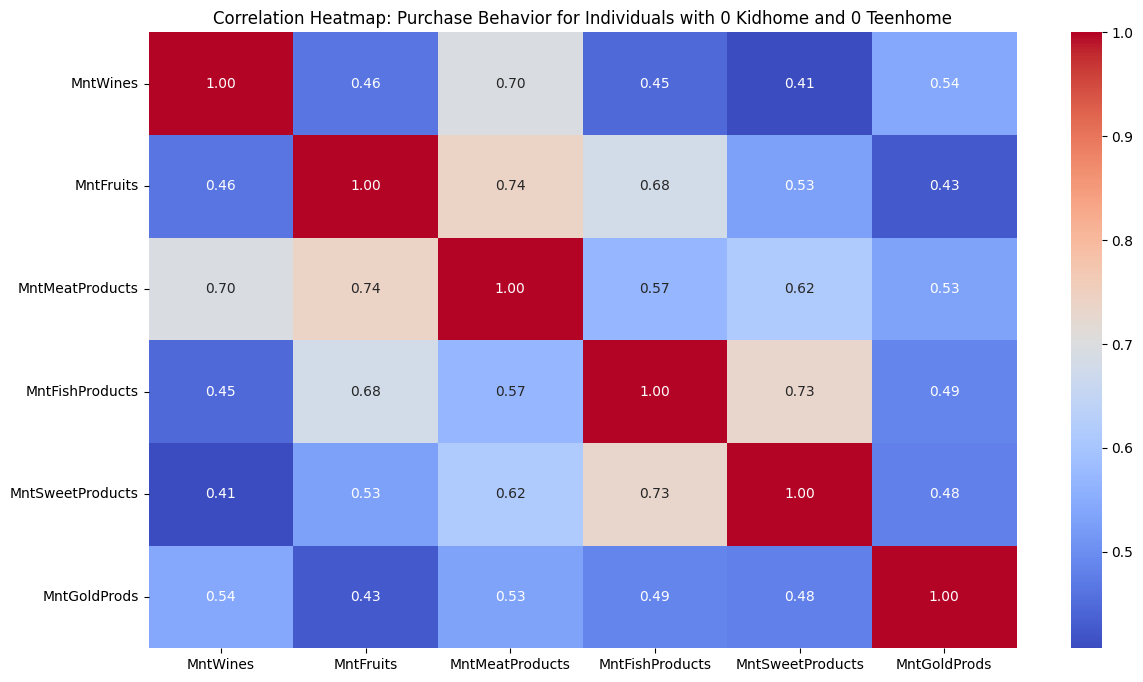

In [64]:
# Graph 3 -
# plt.figure(figsize=(14, 8))

# # defining the purchase columns
# purchase_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# # Create a heatmap
# sns.heatmap(df[purchase_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Correlation Heatmap: Purchase Behavior')
# plt.show()

filtered_df = df[(df['Kidhome'] > 0) & (df['Teenhome'] > 0)]

# Graph 3 - Create a heatmap showing the correlation between purchase behaviors
plt.figure(figsize=(14, 8))

# Defining the purchase columns
purchase_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Create a heatmap
sns.heatmap(filtered_df[purchase_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Purchase Behavior for Individuals with 0 Kidhome and 0 Teenhome')
plt.show()

**Insight** -
This heatmap illustrates the correlation between various purchase categories for customers with at least one child and at least one teenager. It aids in recognizing positive or negative associations between product types, informing strategies for product bundling and promotions. Notably, we observe significant positive relationships between Fruits and Meat, Fish and Sweets, and Meat and Wine for this demographic subset. Thus, marketing campaigns could effectively target combinations of these product categories to appeal to customers with children and teenagers.

## KMEANS

Implementation of K-means clustering on a comprehensive customer dataset, to identify distinct customer segments.

*   Scaling the data using minmax scaler
*   Encoding categorical variables
*   Applying k-Means algorithm on the 'MntMeatProducts' and 'MntWines' features using n_clusters=5
*   Visualize the clusters
*   Applying k-Means algorithm on all features and find the best k using 2 methods
*   Visualize the methods










In [65]:
# Preproccesing and scale the data using MinMaxScaler
df = df.drop('Dt_Customer', axis=1)

# Extract numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns

# One-hot encode categorical columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=False)


df

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0.493611,0.621359,0.084832,0.0,0.0,0.585859,0.425318,0.442211,0.316522,0.664093,...,False,False,False,False,False,False,True,False,False,False
1,0.194263,0.592233,0.067095,0.5,0.5,0.383838,0.007368,0.005025,0.003478,0.007722,...,False,False,False,False,False,False,True,False,False,False
2,0.370029,0.699029,0.105097,0.0,0.0,0.262626,0.285332,0.246231,0.073623,0.428571,...,False,False,False,False,False,False,False,True,False,False
3,0.552408,0.883495,0.037471,0.5,0.0,0.262626,0.007368,0.020101,0.011594,0.038610,...,False,False,False,False,False,False,False,True,False,False
4,0.475739,0.854369,0.085065,0.5,0.0,0.949495,0.115874,0.216080,0.068406,0.177606,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.971316,0.718447,0.089472,0.0,0.5,0.464646,0.474883,0.216080,0.105507,0.162162,...,False,False,False,False,False,True,False,False,False,False
2236,0.357519,0.514563,0.093669,1.0,0.5,0.565657,0.271936,0.000000,0.017391,0.000000,...,False,True,False,False,False,False,False,True,False,False
2237,0.649629,0.854369,0.083092,0.0,0.0,0.919192,0.608171,0.241206,0.125797,0.123552,...,False,False,False,False,True,False,False,False,False,False
2238,0.735859,0.611650,0.101536,0.0,0.5,0.080808,0.286671,0.150754,0.124058,0.308880,...,True,False,False,False,False,False,False,True,False,False


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-66-5af9c6167c3d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_meat_wine['Cluster'] = kmeans.labels_


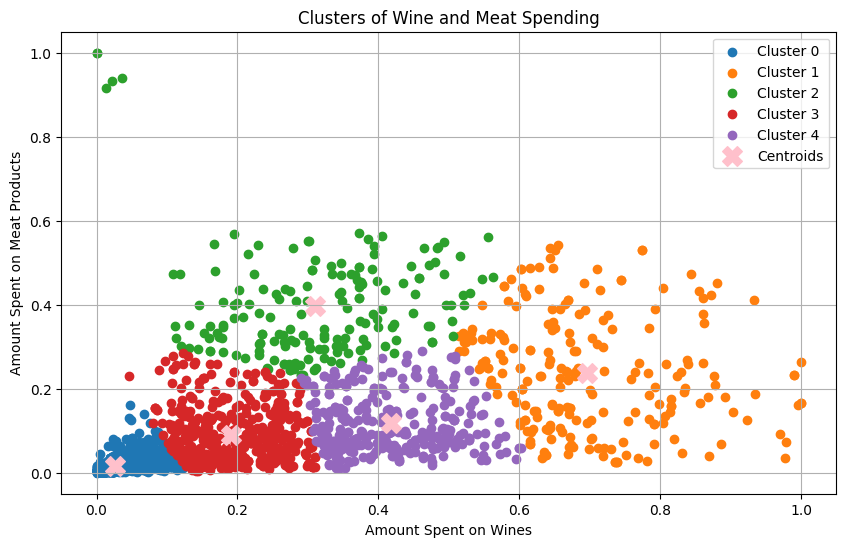

In [66]:
# Apply k-Means on the 'MntWines' and 'MntMeatProducts' features with n_clusters=5

df_meat_wine = df[['MntWines', 'MntMeatProducts']]
kmeans = KMeans(n_clusters=5, random_state=4).fit(df_meat_wine)

# Visualize the clusters

# Add cluster labels to the DataFrame
df_meat_wine['Cluster'] = kmeans.labels_

# Scatter plot
plt.figure(figsize=(10, 6))
for i in range(5):
    cluster_data = df_meat_wine[df_meat_wine['Cluster'] == i]
    plt.scatter(cluster_data['MntWines'], cluster_data['MntMeatProducts'], label=f'Cluster {i}')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='pink', marker='X', label='Centroids')

# Adding labels and title
plt.title('Clusters of Wine and Meat Spending')
plt.xlabel('Amount Spent on Wines')
plt.ylabel('Amount Spent on Meat Products')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

### Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

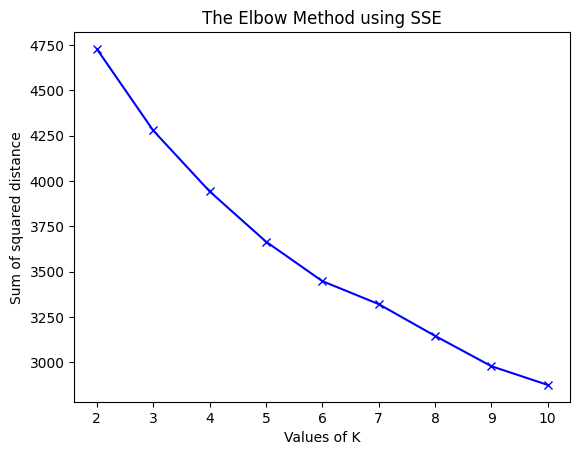

In [67]:
df_all = df.copy()
inertias = []
K = range(2, 11)

# loop over different k values abd calculate the inertia
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(df_all)
    inertias.append(kmeanModel.inertia_)

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Sum of squared distance')
plt.title('The Elbow Method using SSE')
plt.show()

### Silhouette Score Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.14679263920554425


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.18072214701492778


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.1755383500697937


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.18140777419713383


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.18881446794187923


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7 The average silhouette_score is : 0.19844319364748234


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8 The average silhouette_score is : 0.1934055995801791


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9 The average silhouette_score is : 0.2060680357994298


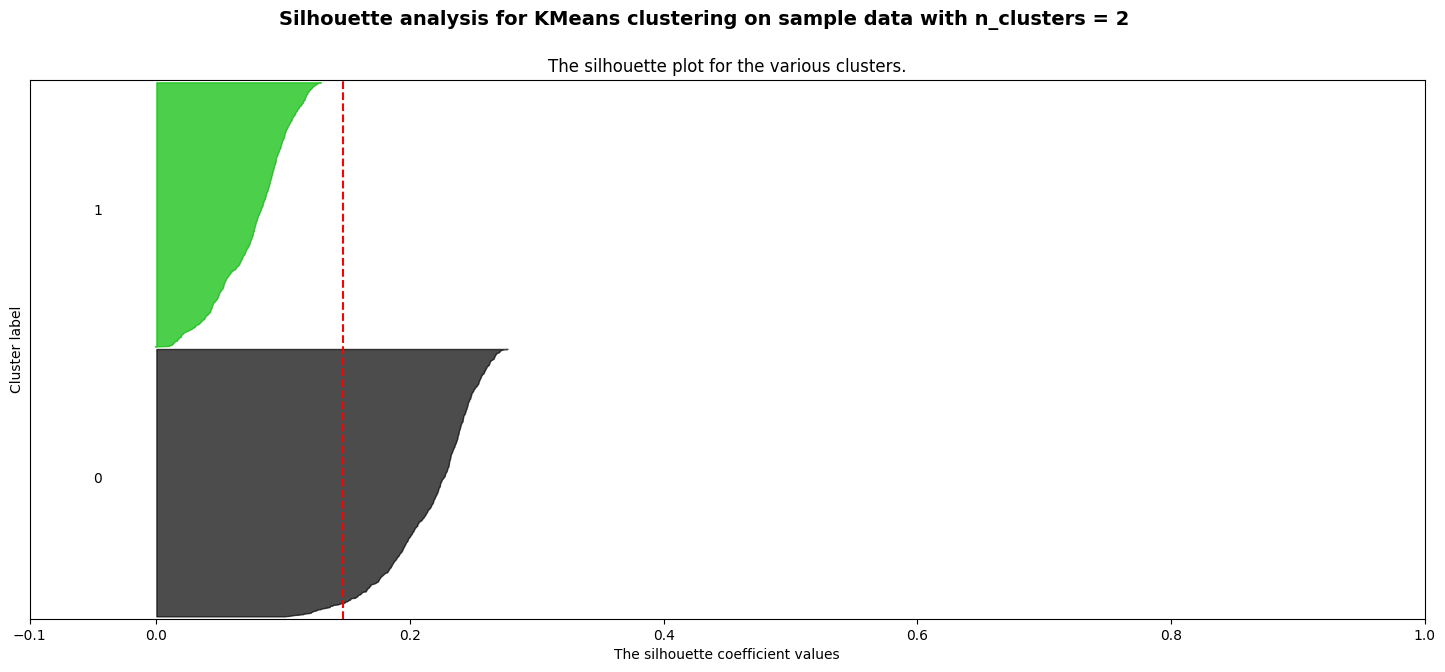

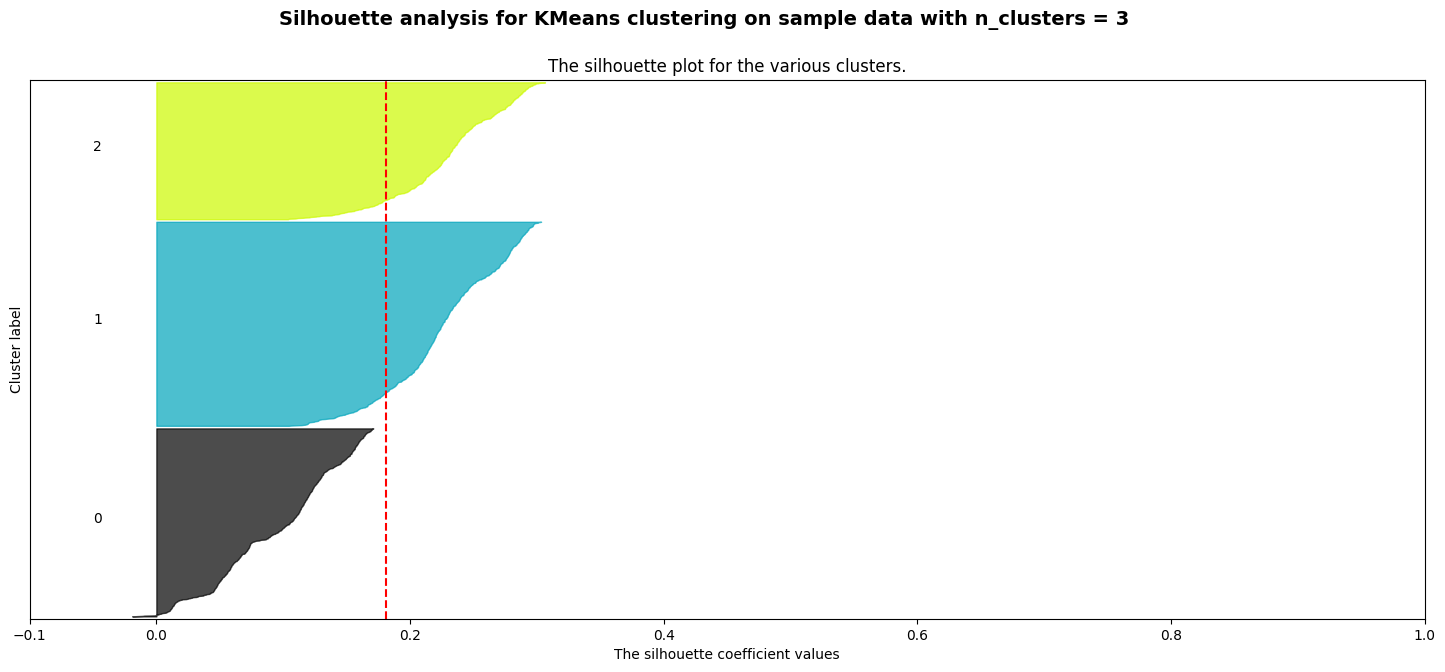

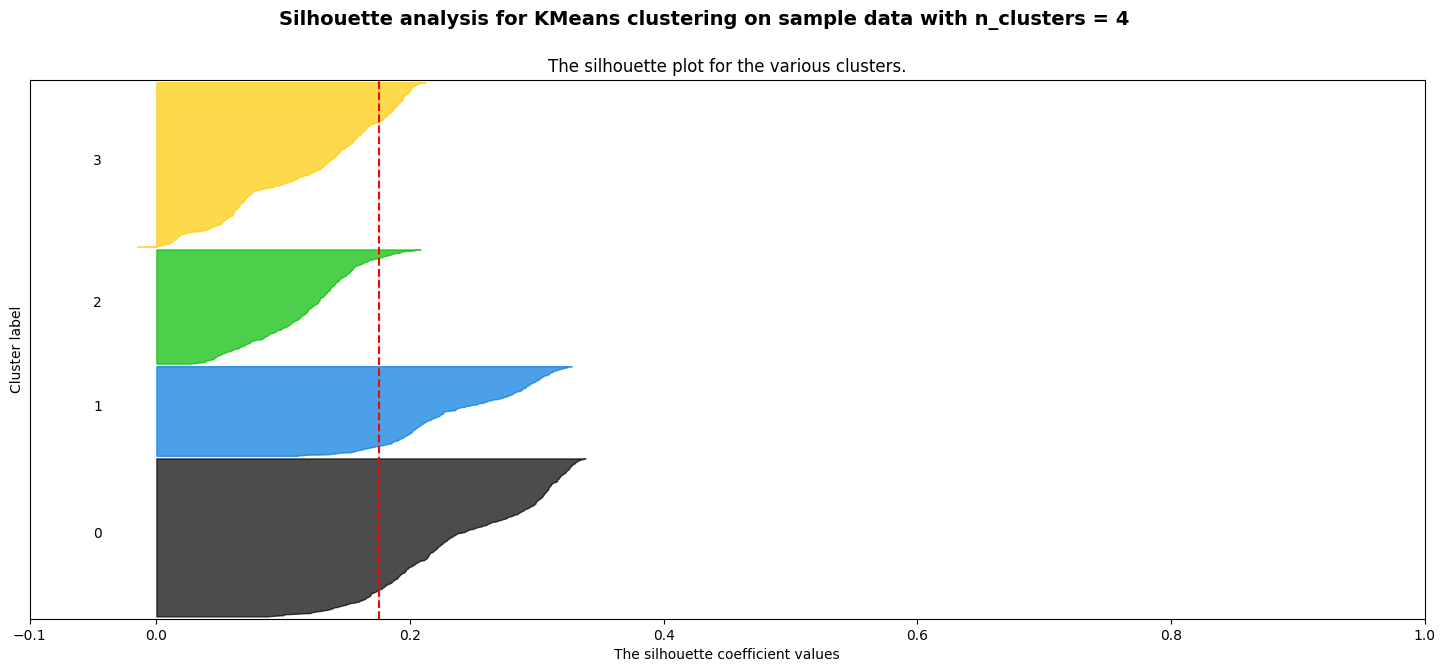

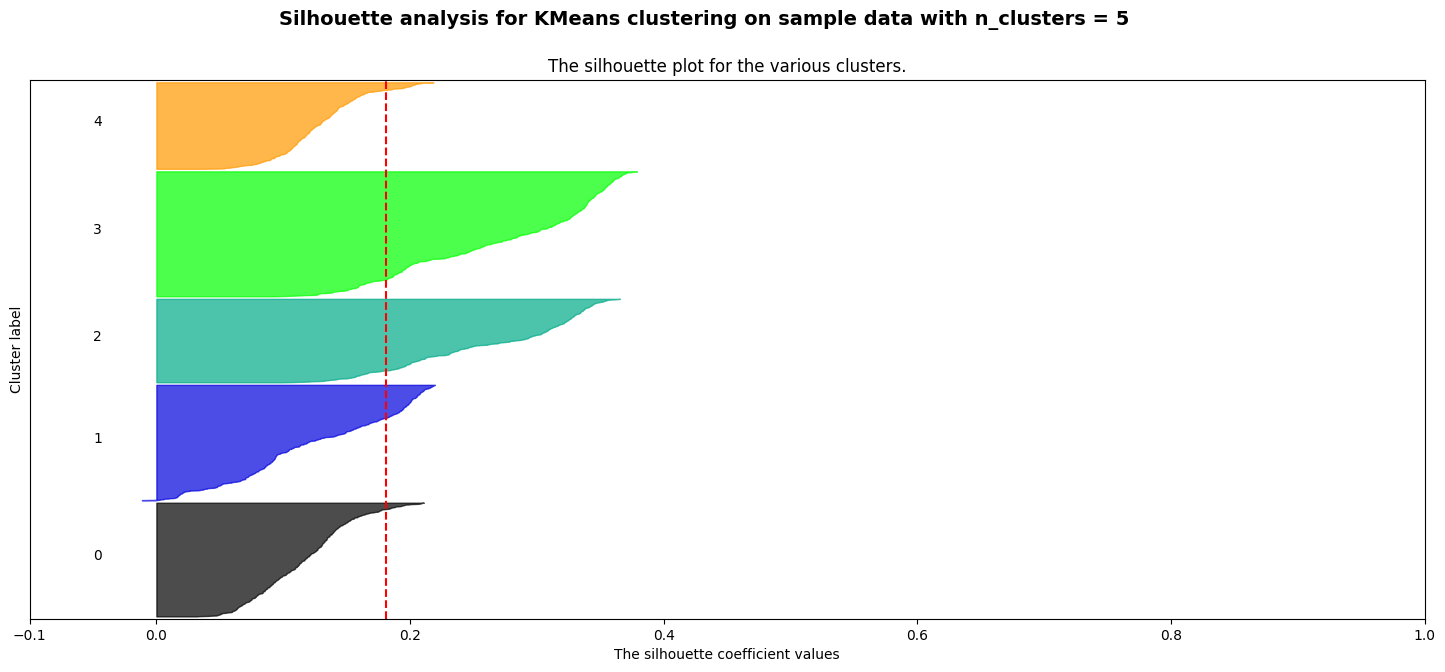

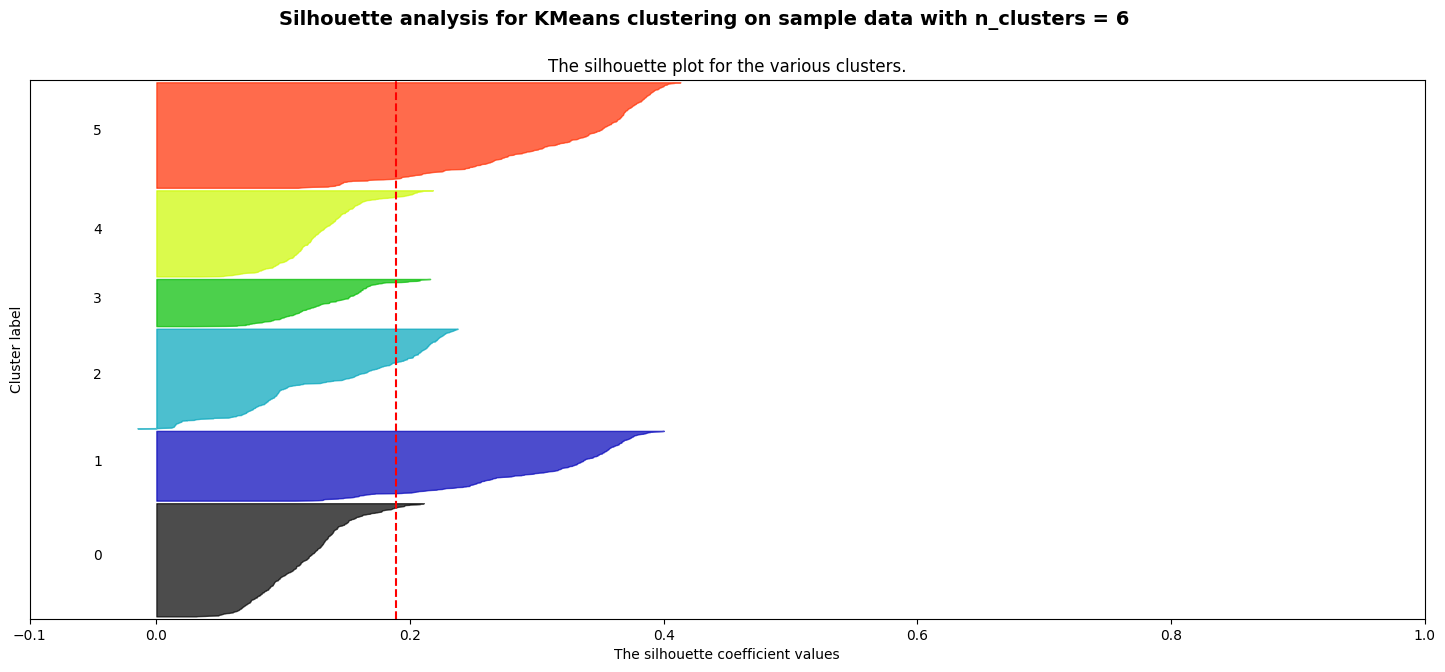

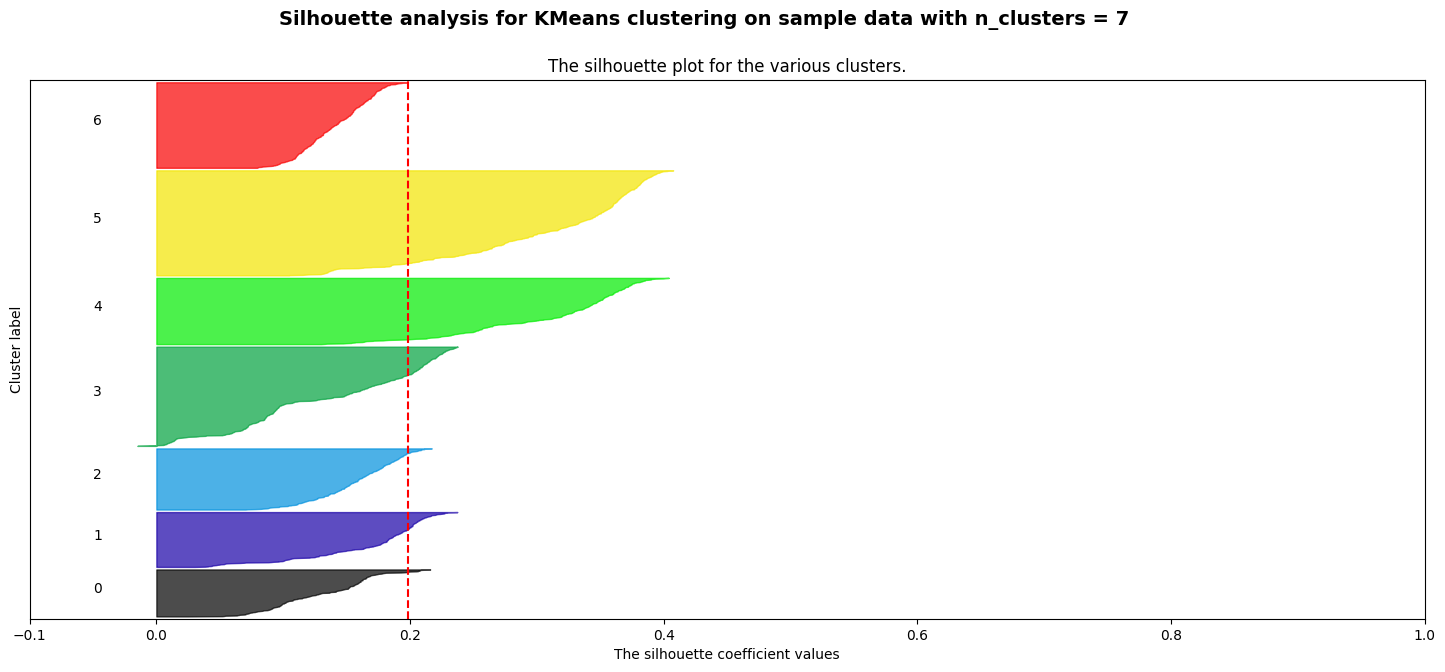

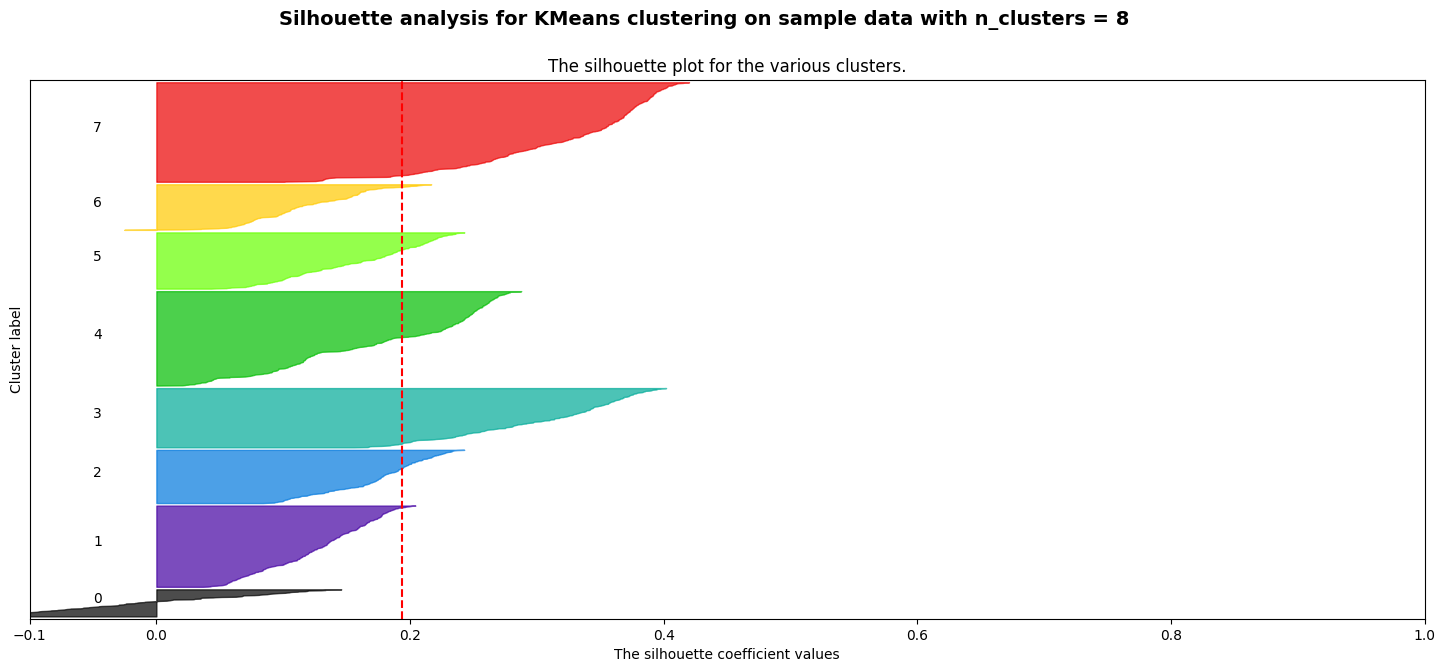

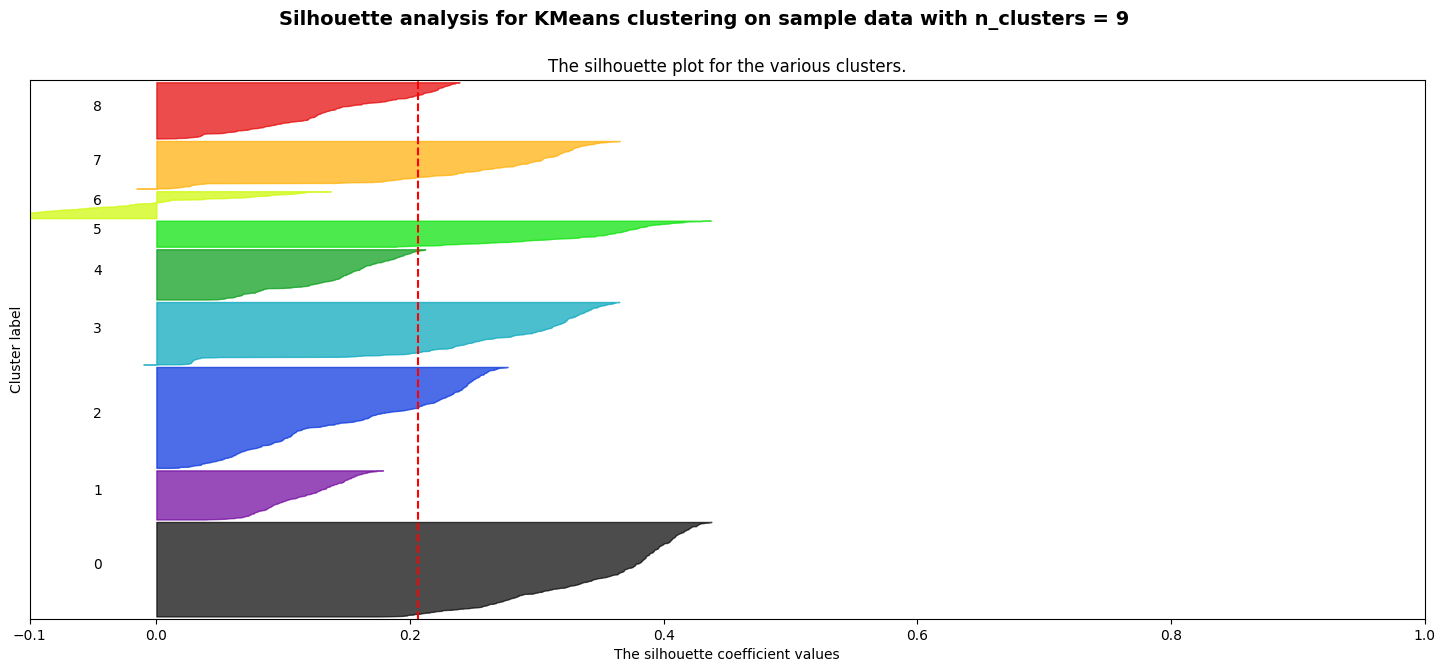

In [68]:
df_all = df.copy()
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_all) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_all)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_all, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_all, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

From both silhouette and elbow methods, the optimal k for clustering will be 9.




## 3. PCA
PCA implementation :
*   With n_components = 2
*   Visualize the PCA
*   Find the variance explined in this PCA





array([0.14139661, 0.1333561 ])

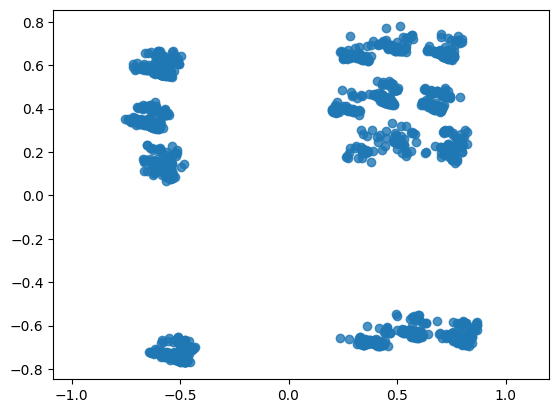

In [69]:
X = df_all.copy()

# Adjust n_components as needed
pca = PCA(n_components=2)
pca.fit(X)

# Create a DataFrame with the principal components
projected = pca.fit_transform(X)

# Plotting the PCA
plt.scatter(projected[:, 0], projected[:, 1], alpha=0.8)
plt.axis('equal')

# Display explained variance

pca.explained_variance_ratio_

**Q**: What is the variance explained in the 2 component PCA?

**A**: PCA1 explains 14% variance of the date and the PCA2 explains 13% variance of the date.

## PCA & Kmeans
This time, we will use the PCA data for the kmeans model.
*   Run PCA with n_components = 2
*   Find the best k for kmeans
*   Plot the best clusters





In [70]:
X = df_all.copy()

# Adjust n_components as needed
pca = PCA(n_components=2)
pca.fit(X)

# Create a DataFrame with the principal components
projected = pca.fit_transform(X)

### Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

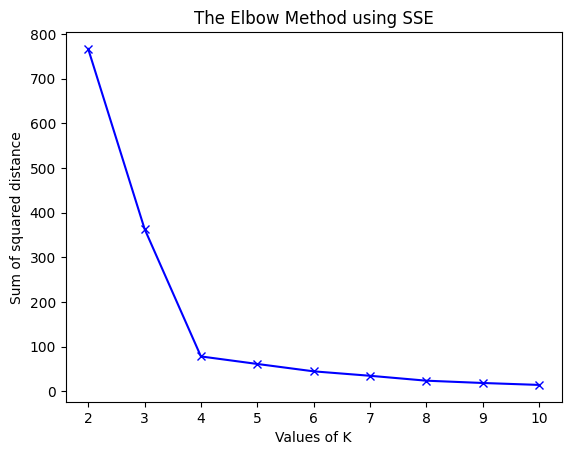

In [71]:
inertias = []
K = range(2, 11)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(projected)
    inertias.append(kmeanModel.inertia_)

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Sum of squared distance')
plt.title('The Elbow Method using SSE')
plt.show()

### Silhouette Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.5194698562852288


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.6459424992608233


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.7995024513292576


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.7062024392760453


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.6672233007812968


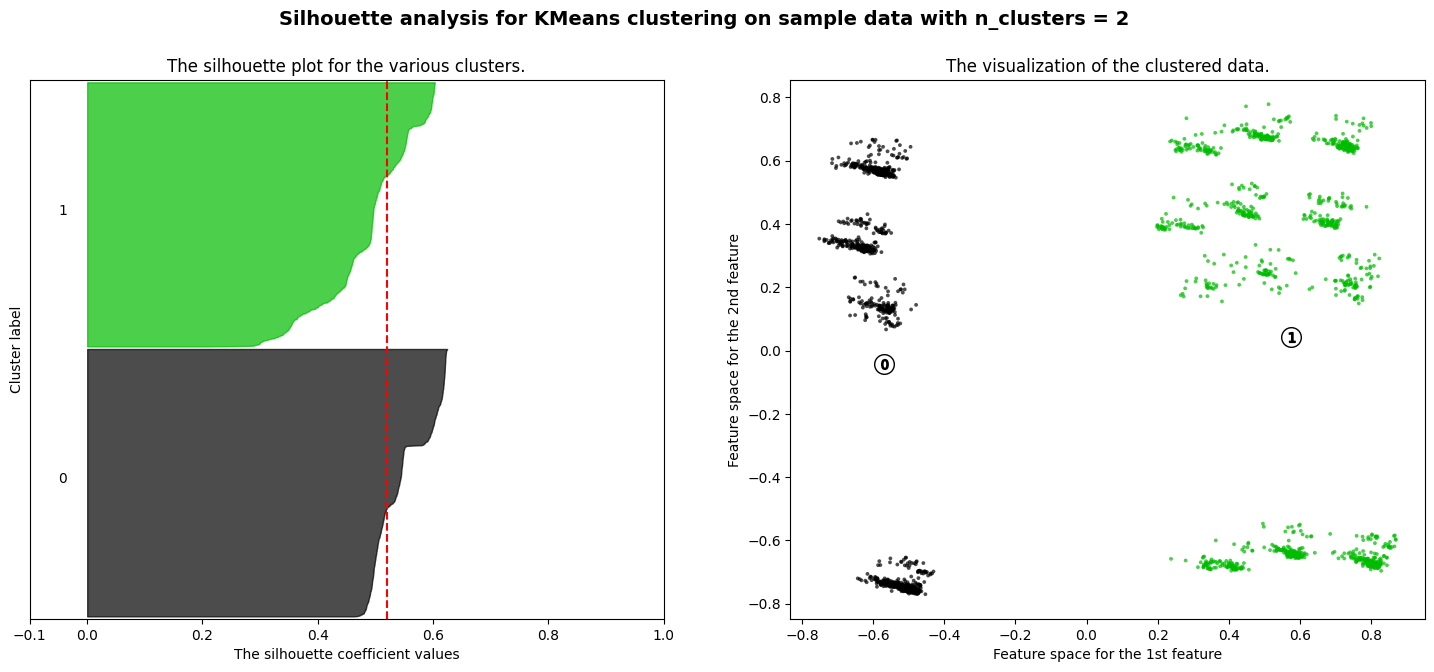

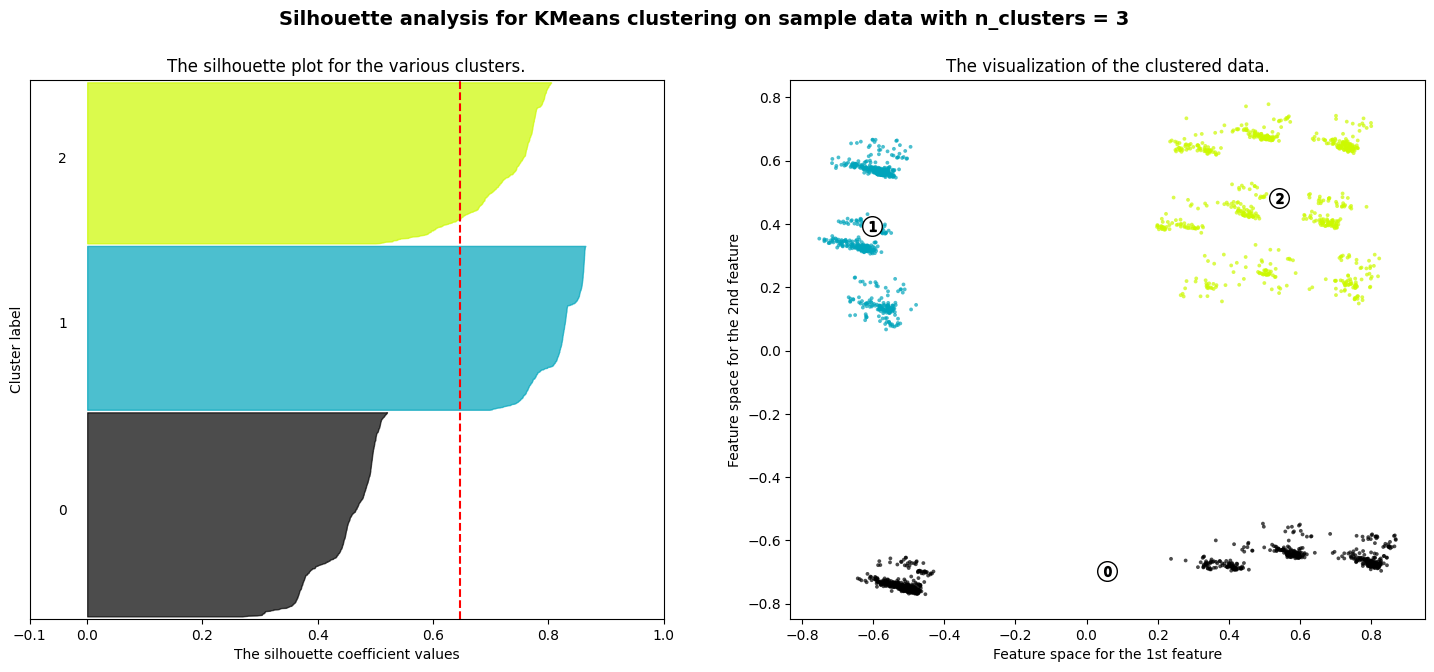

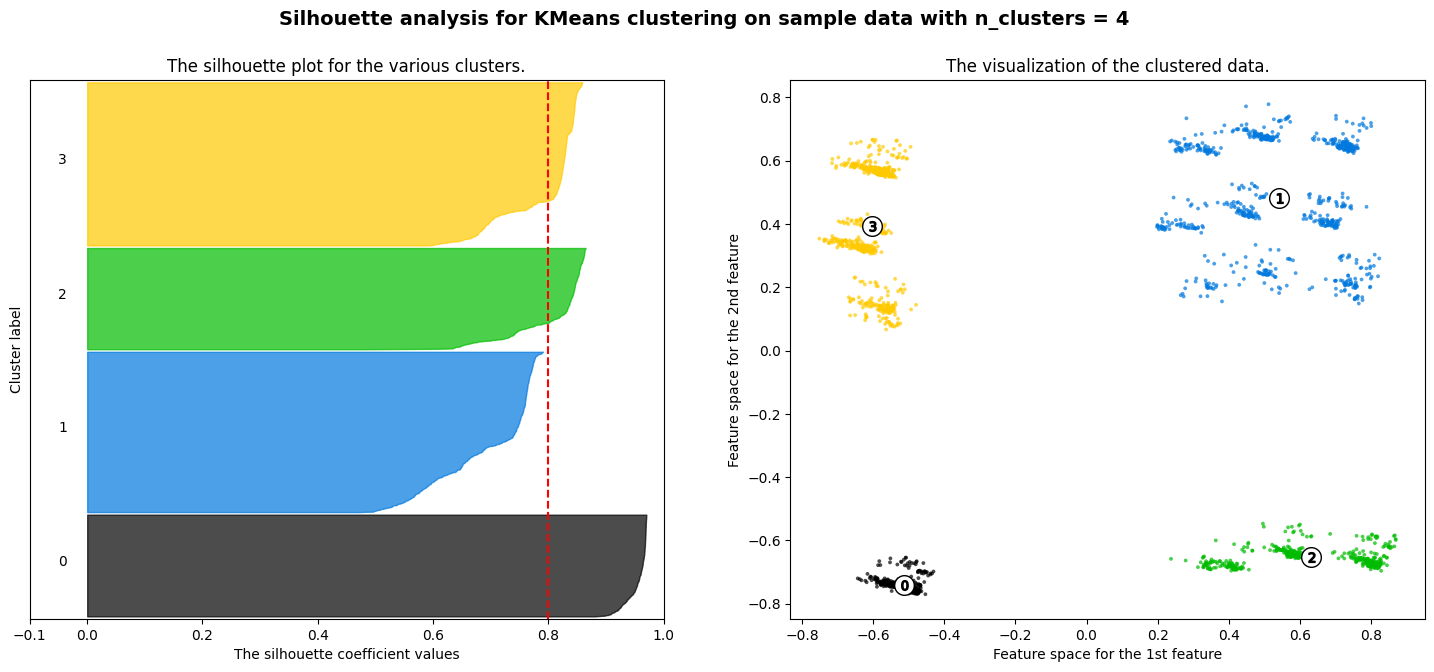

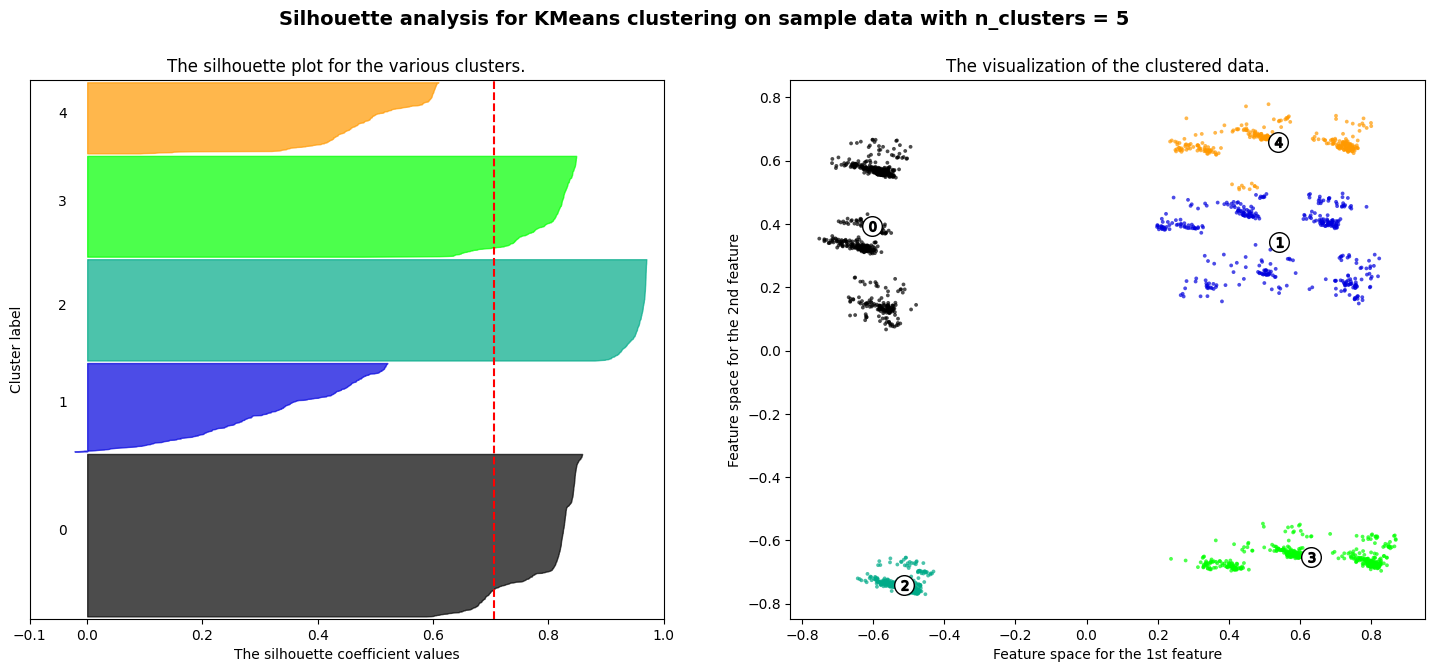

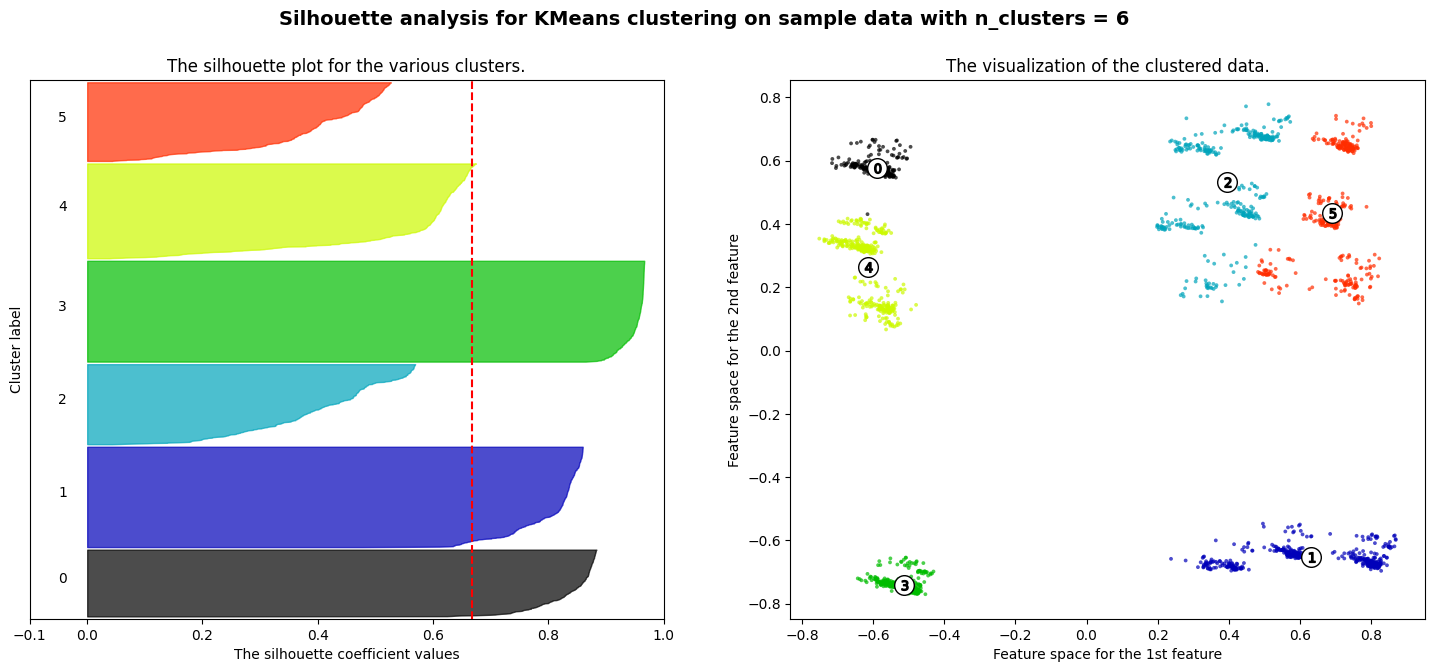

In [72]:

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(projected) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(projected)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(projected, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(projected, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        projected[:, 0], projected[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )
    # ax2.scatter(
    # df_all.iloc[:, 0], df_all.iloc[:, 1],  # Use iloc for DataFrame indexing
    # marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    # )

    # # Labeling the clusters
    centers = clusterer.cluster_centers_
    # # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

From both silhouette and elbow methods, the optimal k for clustering will be 4.
